<a href="https://colab.research.google.com/github/ricardocarreras/Bootcamp_DataScience_student/blob/master/tweetscuentaayuso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tweepy


In [12]:
import pandas as pd

In [58]:
import tweepy

# Configura las credenciales de acceso a la API de Twitter
consumer_key = 'TpOaJ2x2ZlK85Yc8nWxuj5G3c'
consumer_secret = 'bERVKBantrLO1qF8MJkAgrxeHd3NL3bHEReN8lz9KkvtYooIcO'
access_token = '80347254-Mb585QCTiQu0WlylC7QsoXDGeY2uUKDYqPormSgcI'
access_token_secret = '56qrJX96Uaw8JaX5xRy4tlfPN7vipDxs3r3JDjYsr55no'

# Autenticación con la API de Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Crea un objeto API
api = tweepy.API(auth)


In [59]:
# Obtén los tweets de @IdiazAyuso en el rango de fechas especificado
tweets = api.user_timeline(screen_name='IdiazAyuso', count=3200, tweet_mode='extended', include_rts=False, exclude_replies=True)


In [60]:
# Guarda los tweets en un archivo CSV
with open('tweets_ayuso.csv', 'w', encoding='utf-8') as file:
    file.write('Fecha,Texto\n')  # Escribir encabezados en el archivo CSV
    for tweet in tweets:
        file.write(f'{tweet.created_at},{tweet.full_text.replace(",", " ")}\n')


In [66]:
tweetsAyuso23=pd.read_csv("/tweets_ayuso.csv")

In [62]:
tweetsAyuso23

,Fecha,Texto
0,2023-06-02 09:07:14+00:00,Madrid con más fuerza y ganas que nunca cont...
1,Nuevo récord de afiliación en mayo: 3.600.000 ...,NaN
2,Nunca había habido tantas personas trabajando ...,NaN
3,2023-06-01 12:26:06+00:00,La oposición sigue sin enterarse: Ya en el pro...
4,2023-05-31 13:14:39+00:00,La credibilidad de Pedro Sánchez. https://t.co...
...,...,...
335,Madrid será el motor digital de Europa. https:...,NaN
336,2023-03-09 19:01:47+00:00,Madrid lidera el nivel asistencial en atención...
337,2023-03-09 15:55:46+00:00,Podemos no quiere acabar con la desigualdad si...
338,2023-03-09 12:41:34+00:00,Los jóvenes en Madrid tendrán viviendas públic...


In [ ]:
!pip install wordcloud

In [27]:
from wordcloud import WordCloud, STOPWORDS

In [28]:
stopwords = set(STOPWORDS)
stopwords.add("https")

In [ ]:
stopwords

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Carga la lista de stopwords en español
stopwords_es = set(stopwords.words('spanish'))

# Agrega la palabra "https" a la lista de stopwords en español
stopwords_es.add('https')
stopwords_es.add('nan')
stopwords_es.add('t')
stopwords_es.add('co')

# Crea una instancia de WordCloud y establece las stopwords en español
wordcloud = WordCloud(stopwords=stopwords_es)


In [ ]:
# Genera la nube de palabras
wordcloud.generate(xxxxxx)


In [52]:
comment_words = '' 
for val in tweetsAyuso23.Texto: 
    val = str(val) 
    tokens = val.split()  
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud.generate(comment_words)

In [45]:
import matplotlib.pyplot as plt

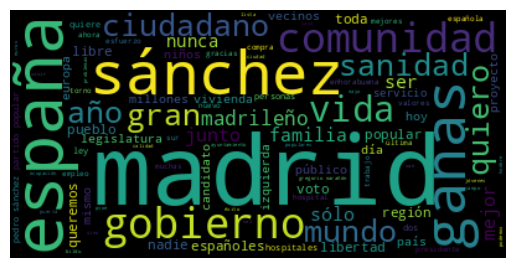

In [53]:
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 

In [47]:
from collections import Counter
import re
text = comment_words
words = re.findall('\w+',text)
print(Counter(words).most_common(60))

[('de', 208), ('nan', 163), ('la', 138), ('y', 88), ('el', 83), ('en', 69), ('https', 67), ('t', 67), ('co', 67), ('a', 65), ('los', 57), ('madrid', 54), ('que', 47), ('con', 37), ('las', 32), ('es', 31), ('del', 30), ('por', 30), ('al', 25), ('más', 24), ('no', 24), ('para', 22), ('sánchez', 21), ('españa', 21), ('una', 20), ('un', 19), ('todos', 19), ('ganas', 15), ('su', 15), ('gobierno', 14), ('se', 13), ('comunidad', 13), ('ha', 11), ('todo', 10), ('vida', 10), ('popular', 9), ('nos', 8), ('sus', 8), ('está', 8), ('gran', 7), ('mundo', 7), ('nuestro', 7), ('quiero', 7), ('sanidad', 7), ('como', 7), ('contra', 7), ('le', 6), ('ser', 6), ('mejor', 6), ('sólo', 6), ('nunca', 5), ('españoles', 5), ('nadie', 5), ('este', 5), ('libertad', 5), ('madrileños', 5), ('años', 5), ('región', 5), ('queremos', 5), ('entre', 5)]


In [ ]:

# Realiza la consulta para tweets en español que mencionen a @IdiazAyuso en el rango de fechas especificado
query = 'from:IdiazAyuso lang:es'
max_tweets = 10000  # Define el número máximo de tweets que deseas obtener
tweets = tweepy.Cursor(api.search_tweets, q=query, tweet_mode='extended').items(max_tweets)

# Procesa los tweets obtenidos
for tweet in tweets:
    print(tweet.full_text)


In [68]:
# Guarda los tweets en un archivo CSV
with open('tweetstodosayuso.csv', 'w', encoding='utf-8') as file:
    file.write('Fecha,Texto\n')  # Escribir encabezados en el archivo CSV
    for tweet in tweets:
        file.write(f'{tweet.created_at},{tweet.full_text.replace(",", " ")}\n')

In [ ]:
tweetstodosAyuso23=pd.read_csv("/tweetstodosayuso.csv")